In [31]:
import pandas as pd
import numpy as np
import math
df = pd.read_csv('pilrek.csv',delimiter = ',')

In [32]:
df.tail() #menguji dataframe pandas

,Timestamp,Kategori Anda,Kategori Umur Anda,CaRek Pilihan,Alasan Memilih CaRek,Harapan Anda
949,9/15/2019 21:16:05,Dosen,> 40 th,Sigit Puji Santosa (FTMD),Mendatangkan dana riset dan kerjasama eksterna...,Pak Sigit punya pengalaman akademisi yg mampun...
950,9/16/2019 3:34:10,Umum,< 25 th,Dicky Rezady Munaf (FSRD),Dedikasi yang kuat serta kejujuran luar biasa....,Bapak Dicky Rezady Munaf menjadi Rektor ITB ka...
951,9/16/2019 8:27:20,Dosen,> 40 th,I Nyoman Pugeg Aryantha (SITH),Akhlak dan budi pekerti,ITB sebagai perguruan tinggi yang berkualitas ...
952,9/17/2019 8:58:24,Umum,25 - 40 th,Dicky Rezady Munaf (FSRD),Keberhasilan dan prestasi,Semoga dgn kepemimpinan Bpk. ITB dapat berkemb...
953,9/17/2019 9:52:24,Pegawai / Tendik,> 40 th,I Nyoman Pugeg Aryantha (SITH),Sesuai dengan kriteria kekinian (Rektor 4.0),Diharapkan Rektor baru peduli terhadap lingkun...


Text(0, 0.5, 'Sebaran Pilihan Civitas Kampus')

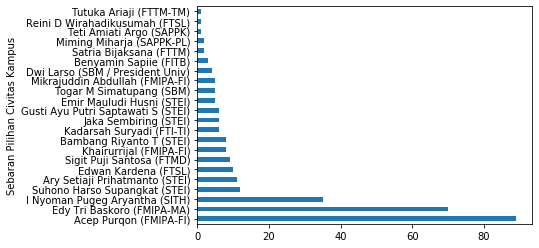

In [33]:
#VISUALISASI KE 1
#melihat visualisasi pilihan kategori pengisi survey yang termasuk civitas kampus, yaitu mahasiswa, dosen, dan pegawai

civitas = df.loc[(df['Kategori Anda'] == 'Mahasiswa') | (df['Kategori Anda'] == 'Dosen') | (df['Kategori Anda'] == 'Pegawai')]
civitas['CaRek Pilihan'].value_counts().plot(kind='barh').set_ylabel('Sebaran Pilihan Civitas Kampus')

Text(0, 0.5, 'Sebaran Pilihan Non Civitas Kampus')

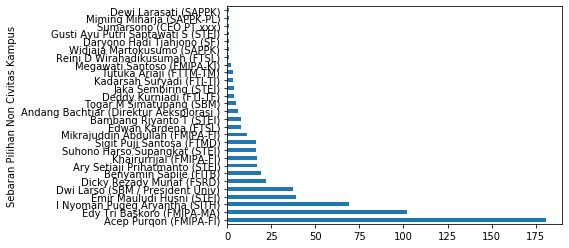

In [34]:
#VISUALISASI KE 2
#melihat visualisasi pilihan kategori pengisi survey yang bukan termasuk civitas kampus, yaitu umum dan alumni
non_civitas = df.loc[(df['Kategori Anda'] == 'Alumni') | (df['Kategori Anda'] == 'Umum')]
non_civitas['CaRek Pilihan'].value_counts().plot(kind='barh').set_ylabel('Sebaran Pilihan Non Civitas Kampus')

In [35]:
#Mengelompokkan tiap harapan dengan menginspeksi tiap kata

example = dict()
example['ITB & Indonesia Maju'] = ['ri','nkri','itb','maju','indonesia','bangsa','manfaat','negara'];
example['ITB lebih berkualitas'] = ['baik','mahasiswa','itb', 'kualitas','baik','sukses','great','unggu'];
example['ITB lebih ramah'] = ['nasional','malam','humanis','akhlak','budi','itb','ramah','rakyat','kolaborasi','kerjasama','service','kenal','humanis'];
example['ITB meningkatkan kesejahtraan'] = ['gratis','itb','sejahtera'];
example['ITB lebih kompeten'] = ['dunia','terbaik','perkembangan','internasional','itb','ranking','unggul','bersaing','energi','unggul','semangat','penelitian','depan','perhitungkan'];
example['ITB berorientasi industri'] = ['itb','industri'];


harapan_categorical = []

for harapan in df['Harapan Anda'].values:
  counter = dict()
  #mengecek apakah nan
  if type(harapan) == float:
    harapan = ''
  #mengecek kecocokan tiap huruf
  for key in example.keys():
    counter[key] = 0
    for value in example[key]:
      if value in harapan.lower():
        counter[key] += 1
  largest = 0
  largest_key = 'tidak berkomentar'
  for key in counter.keys():
    if counter[key] > largest:
      largest = counter[key]
      largest_key = key
  harapan_categorical.append(largest_key)

df['Harapan Kategorikal'] = harapan_categorical
df

,Timestamp,Kategori Anda,Kategori Umur Anda,CaRek Pilihan,Alasan Memilih CaRek,Harapan Anda,Harapan Kategorikal
0,9/1/2019 7:47:18,Alumni,25 - 40 th,Jaka Sembiring (STEI),Sesuai dengan kriteria kekinian (Rektor 4.0),NaN,tidak berkomentar
1,9/1/2019 8:33:56,Alumni,> 40 th,Suhono Harso Supangkat (STEI),Tipe yg futuristik dan outside-the-box yg bisa...,NaN,tidak berkomentar
2,9/1/2019 8:59:43,Umum,25 - 40 th,Suhono Harso Supangkat (STEI),Sesuai dengan kriteria kekinian (Rektor 4.0),Menjadikan itb peningkat sumber daya manusia i...,ITB & Indonesia Maju
3,9/1/2019 9:26:44,Pegawai / Tendik,> 40 th,Suhono Harso Supangkat (STEI),Sesuai dengan kriteria kekinian (Rektor 4.0),NaN,tidak berkomentar
4,9/1/2019 12:25:40,Dosen,25 - 40 th,Kadarsah Suryadi (FTI-TI),Karakter kepemimpinan dan leadership,NaN,tidak berkomentar
5,9/1/2019 12:26:46,Pegawai / Tendik,25 - 40 th,Suhono Harso Supangkat (STEI),Mendatangkan dana riset dan kerjasama eksterna...,Dapat menjadikan ITB lebih berkembang lagi dal...,ITB & Indonesia Maju
6,9/1/2019 12:27:13,Alumni,> 40 th,Suhono Harso Supangkat (STEI),Keberhasilan dan prestasi,ITB lebih meningkat secara kualitas,ITB lebih berkualitas
7,9/1/2019 12:28:42,Dosen,25 - 40 th,Bambang Riyanto T (STEI),Akhlak dan budi pekerti,ITB menjadi kampus yang lebih ramah terhadap p...,ITB lebih ramah
8,9/1/2019 12:54:47,Dosen,25 - 40 th,Miming Miharja (SAPPK-PL),Karakter kepemimpinan dan leadership,Semoga rektor terpilih bisa meningkatkan kuali...,ITB lebih berkualitas
9,9/1/2019 13:58:03,Umum,> 40 th,Togar M Simatupang (SBM),Keberhasilan dan prestasi,"Prof. Togar Simatupang, memiliki kapabilitas m...",ITB & Indonesia Maju


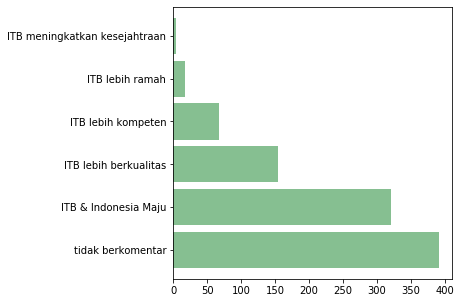

In [36]:
#VISUALISASI KE 3
#Memvisualisasi frekuensi tiap kelompok harapan sesuai dictionary

df['Harapan Kategorikal'].value_counts().plot(kind='barh', figsize=(5, 5), color='#86bf91', zorder=2, width=0.85)

In [37]:
#VISUALISASI KE 4

In [38]:
df = pd.concat([df,pd.get_dummies(df['Harapan Kategorikal'], prefix='Harapan Kategorikal')],axis=1) #membentuk tabel one hot encoding dengan memecah kolom 'Harapan kategorikal'
df.drop(['Harapan Kategorikal'],axis=1, inplace=True) #membuang kolom 'Harapan Kategorikal'
df.drop(['Harapan Anda'],axis=1, inplace=True)#membuang kolom 'Harapan Anda'
df.drop(['Kategori Anda'],axis=1, inplace=True)#membuang kolom 'Kategori Anda'
df.drop(['Kategori Umur Anda'],axis=1, inplace=True)#membuang kolom 'Kategori Umur Anda'
df.drop(['Timestamp'],axis=1, inplace=True)#membuang kolom 'Timestamp'
df.drop(['Alasan Memilih CaRek'],axis=1, inplace=True)#membuang kolom 'Alasan Memilih CaRek'

In [39]:
df

,CaRek Pilihan,Harapan Kategorikal_ITB & Indonesia Maju,Harapan Kategorikal_ITB lebih berkualitas,Harapan Kategorikal_ITB lebih kompeten,Harapan Kategorikal_ITB lebih ramah,Harapan Kategorikal_ITB meningkatkan kesejahtraan,Harapan Kategorikal_tidak berkomentar
0,Jaka Sembiring (STEI),0,0,0,0,0,1
1,Suhono Harso Supangkat (STEI),0,0,0,0,0,1
2,Suhono Harso Supangkat (STEI),1,0,0,0,0,0
3,Suhono Harso Supangkat (STEI),0,0,0,0,0,1
4,Kadarsah Suryadi (FTI-TI),0,0,0,0,0,1
5,Suhono Harso Supangkat (STEI),1,0,0,0,0,0
6,Suhono Harso Supangkat (STEI),0,1,0,0,0,0
7,Bambang Riyanto T (STEI),0,0,0,1,0,0
8,Miming Miharja (SAPPK-PL),0,1,0,0,0,0
9,Togar M Simatupang (SBM),1,0,0,0,0,0


In [40]:
plot1 = df.groupby('CaRek Pilihan').sum()[['Harapan Kategorikal_ITB & Indonesia Maju']].sort_values(by=['Harapan Kategorikal_ITB & Indonesia Maju'],ascending = False).head()
#Melakukan grouby dengan source 'CaRek Pilihan'
#Grouby dilakukan dengan menjumlah nilai per 'CaRek Pilihan' untuk kolom 'Harapan Kategorikal_ITB & Indonesia Maju'
#Hasil groupby kemudian di sort dengan ascending false agar terurut dari nilai terbesar ke terkecil, kemudian head untuk mengambil 5 CaRek tertinggi
plot1
#Menampilkan tabel groupby

,Harapan Kategorikal_ITB & Indonesia Maju
CaRek Pilihan,
Acep Purqon (FMIPA-FI),83
Edy Tri Baskoro (FMIPA-MA),73
I Nyoman Pugeg Aryantha (SITH),34
Emir Mauludi Husni (STEI),19
Dwi Larso (SBM / President Univ),15


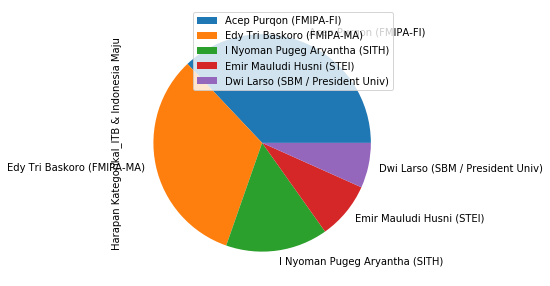

In [41]:
plot = plot1.plot.pie(y='Harapan Kategorikal_ITB & Indonesia Maju',figsize=(5, 5))
#plot dengan pie chart 

In [42]:
#VISUALISASI KE 5
plot2 = df.groupby('CaRek Pilihan').sum()[['Harapan Kategorikal_ITB lebih berkualitas']].sort_values(by=['Harapan Kategorikal_ITB lebih berkualitas'],ascending = False).head()
#Melakukan grouby dengan source 'CaRek Pilihan'
#Grouby dilakukan dengan menjumlah nilai per 'CaRek Pilihan' untuk kolom 'Harapan Kategorikal_ITB lebih berkualitas'
#Hasil groupby kemudian di sort dengan ascending false agar terurut dari nilai terbesar ke terkecil, kemudian head untuk mengambil 5 CaRek tertinggi
plot2
#menampilkan tabel groupby

,Harapan Kategorikal_ITB lebih berkualitas
CaRek Pilihan,
Acep Purqon (FMIPA-FI),43
Edy Tri Baskoro (FMIPA-MA),30
I Nyoman Pugeg Aryantha (SITH),15
Dwi Larso (SBM / President Univ),9
Emir Mauludi Husni (STEI),7


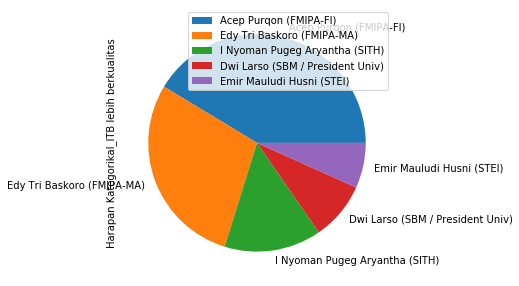

In [43]:
plot = plot2.plot.pie(y='Harapan Kategorikal_ITB lebih berkualitas',figsize=(5, 5))
#plot dengan pie chart